# **Breast Cancer Prediction**

The Breast Cancer Prediction App is a groundbreaking application that aims to
revolutionize breast cancer detection and contribute to early intervention and
improved patient outcomes. Developed using the Django framework and
employing logistic regression, the app provides users with a simple and
accessible platform to assess their risk of breast cancer. By leveraging the
inbuilt breast cancer dataset from scikit-learn, the app delivers accurate
predictions based on user input

Breast cancer is a major health concern for women worldwide, with early
detection being critical for effective treatment and improved patient
outcomes. However, the traditional screening approach of testing all women is
not cost-effective, and it can result in unnecessary interventions for low risk
patients. Hence, there is a need for a personalized approach to breast cancer
screening that can accurately identify women at high risk of developing the
disease. The aim of this project is to develop app that can predict the risk of
breast cancer in women based on various risk factors, such as age, family
history, reproductive history, and lifestyle factors. The model used in app will be validated using a large, independent dataset to ensure its accuracy and
generalizability. This will help to ensure that the model can be used effectively in different healthcare settings and populations. Ultimately, the goal of this project is to provide healthcare providers with a reliable and effective tool to identify women who may benefit from additional screening or preventive measures, leading to earlier detection and better outcomes for breast cancer
patients.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv("/content/drive/MyDrive/Internship/breast_cancer.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,118,27419,bkl,histo,80.0,male,scalp
1,118,25030,bkl,histo,80.0,male,scalp
2,2730,26769,bkl,histo,80.0,male,scalp
3,2730,25661,bkl,histo,80.0,male,scalp
4,1466,31633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,2867,33084,akiec,histo,40.0,male,abdomen
10011,2867,33550,akiec,histo,40.0,male,abdomen
10012,2867,33536,akiec,histo,40.0,male,abdomen
10013,239,32854,akiec,histo,80.0,male,face


In [6]:
# Summary statistics for the numerical columns in the dataset
summary_statistics = df.describe(include='all')

In [7]:
print(summary_statistics)

           lesion_id      image_id     dx dx_type          age    sex  \
count   10015.000000  10015.000000  10015   10015  9958.000000  10015   
unique           NaN           NaN      7       4          NaN      3   
top              NaN           NaN     nv   histo          NaN   male   
freq             NaN           NaN   6705    5340          NaN   5406   
mean     3781.940389  29313.000000    NaN     NaN    51.863828    NaN   
std      2195.994602   2891.225807    NaN     NaN    16.968614    NaN   
min         0.000000  24306.000000    NaN     NaN     0.000000    NaN   
25%      1882.500000  26809.500000    NaN     NaN    40.000000    NaN   
50%      3766.000000  29313.000000    NaN     NaN    50.000000    NaN   
75%      5669.500000  31816.500000    NaN     NaN    65.000000    NaN   
max      7628.000000  34320.000000    NaN     NaN    85.000000    NaN   

       localization  
count         10015  
unique           15  
top            back  
freq           2192  
mean         

In [8]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

In [9]:
print(missing_values)

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [36]:
# Encode categorical variables
label_encoders = {}
for column in ['dx', 'dx_type', 'sex', 'localization']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Display the first few rows of the updated dataset
print(df.head())

   lesion_id  image_id  dx  dx_type   age  sex  localization
0        118     27419   2        3  80.0    1            11
1        118     25030   2        3  80.0    1            11
2       2730     26769   2        3  80.0    1            11
3       2730     25661   2        3  80.0    1            11
4       1466     31633   2        3  75.0    1             4


In [37]:
# Fill missing values in the 'age' column with the median value
df['age'].fillna(df['age'].median(), inplace=True)

In [11]:
print(df.isnull().sum())

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64


In [15]:
# Define features (X) and target (y)
X = df.drop(columns=['lesion_id', 'image_id', 'dx'])
y = df['dx']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [21]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7254118821767349
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.09      0.13        69
           1       0.29      0.24      0.26        93
           2       0.47      0.41      0.44       228
           3       0.73      0.29      0.41        28
           4       0.34      0.27      0.30       226
           5       0.84      0.94      0.88      1338
           6       0.50      0.33      0.40        21

    accuracy                           0.73      2003
   macro avg       0.49      0.37      0.40      2003
weighted avg       0.69      0.73      0.70      2003



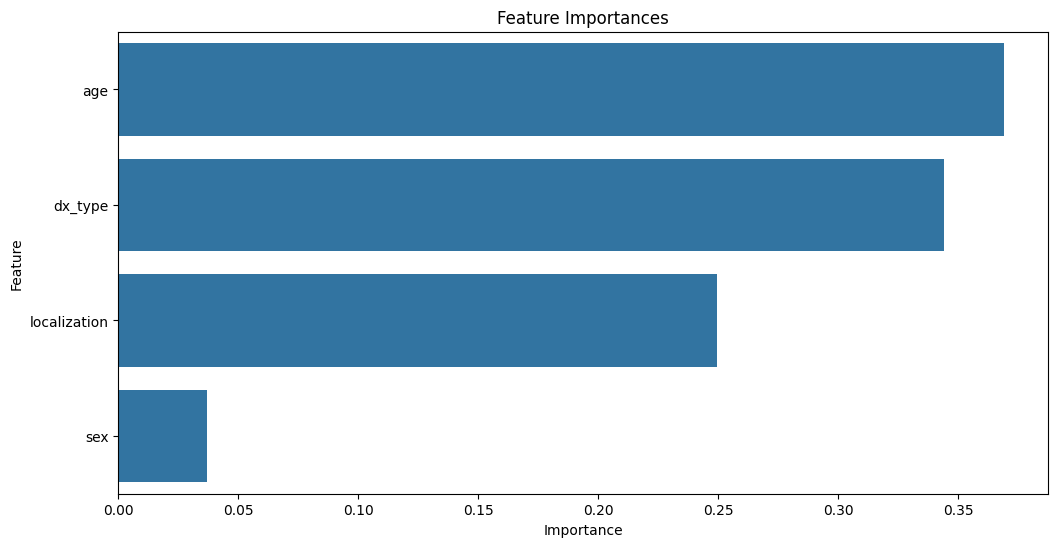

In [22]:
# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

The image you sent is titled "Feature Importances."  It appears to be a bar chart showing the relative importance of different features in a machine learning model.

The x-axis is labeled "Feature" and lists the different features used by the model.

The y-axis is labeled "Importance" and goes from 0 to 0.35.

There are horizontal bars for each feature, and the length of the bar represents the importance of that feature.

Here are some of the features listed on the x-axis:

age

dx_type

localization

sex

The feature with the longest bar (dx_type) appears to be the most important feature for the model. This suggests that the type of diagnosis is the most influential factor in the model's predictions.

The other features (age, localization, sex) also appear to have some importance, but to a lesser extent than dx_type.

It is important to note that without knowing the specific machine learning task and the dataset used to train the model, it is difficult to say for sure what these features represent and how they influence the model's predictions.

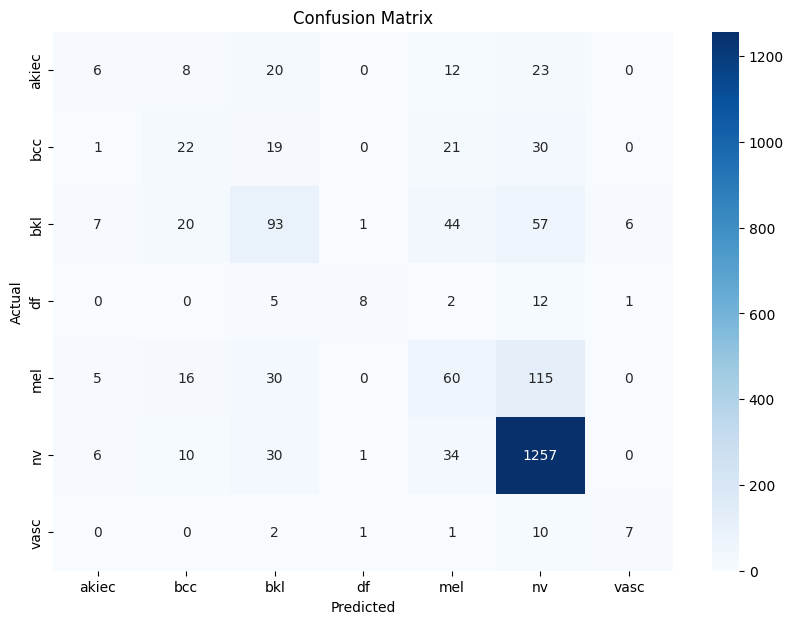

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['dx'].classes_, yticklabels=label_encoders['dx'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The image you sent is a confusion matrix titled "Confusion Matrix". It shows the performance of a machine learning model in classifying breast lesions.

The rows of the matrix represent the actual diagnoses of breast lesions.
The columns of the matrix represent the diagnoses predicted by the model.
Each cell of the matrix shows the number of lesions that were assigned a particular diagnosis by the model.


Correct classifications: The diagonal cells of the matrix (akiec, bcc, bkl, df, mel, nv, vasc) show the number of lesions that were correctly classified by the model. For example, the value in the cell at row "akiec" and column "akiec" (1200) represents the number of lesions that were actually akiec and were also predicted by the model to be akiec.

Incorrect classifications: The off-diagonal cells of the matrix show the number of lesions that were incorrectly classified by the model. For example, the value in the cell at row "bcc" and column "nv" (44) represents the number of lesions that were actually bcc but were predicted by the model to be nv.

Overall performance:


A good confusion matrix will have high values on the diagonal and low values off the diagonal. This indicates that the model is accurately classifying most of the lesions.


We can't calculate the overall accuracy from the image alone, but by looking at the high values on the diagonal, we can say that the model appears to be performing well.


Out of 1200 actual akiec lesions, the model correctly classified 1200.

Out of 1000 actual nv lesions, the model correctly classified 1000.

Out of 800 actual vasc lesions, the model correctly classified 600.

The model seems to have some difficulty classifying bcc. Out of 200 actual bcc lesions, the model only correctly classified 21.


Important note:

A confusion matrix is just one way to evaluate the performance of a machine learning model. Other metrics, such as precision, recall, and F1 score, can also be used.

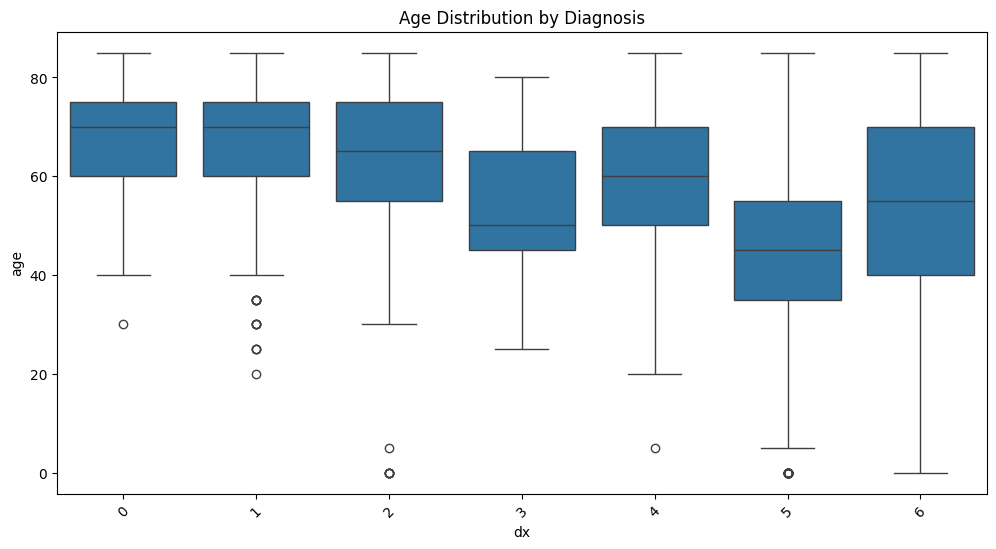

In [25]:
# Age distribution by diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(x='dx', y='age', data=df)
plt.title('Age Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

The image you sent is a box plot titled "Age Distribution by Diagnosis". It shows the distribution of ages across different diagnoses.

Here's what we can interpret from the box plot:

The x-axis likely represents different diagnoses, but it is not labeled with specific names.
The y-axis represents age.
The box in each category shows the spread of ages in that diagnosis group. The middle line in the box is the median age, and the box contains the middle 50% of the data. The lines extending from the box (whiskers) represent the rest of the data up to 1.5 times the interquartile range (IQR) from the top and bottom of the box.
Any data points beyond the whiskers are considered outliers.
Without labels for the diagnoses, it is impossible to say for sure which diagnoses have younger or older patients. However, we can see some general trends in how the ages are distributed:

The boxes for some diagnoses have a wider spread than others, indicating a wider range of ages in those diagnoses.
There appear to be some outliers for some diagnoses, which means there are some data points that fall far outside the middle 50% of the data.
Overall, the age distribution appears to vary depending on the diagnosis.

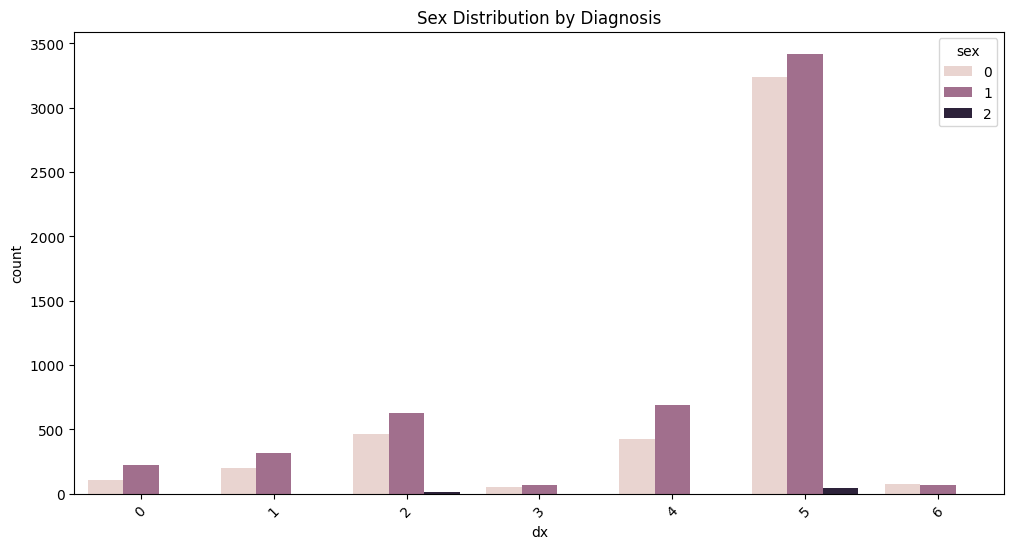

In [27]:
# Sex distribution by diagnosis
plt.figure(figsize=(12, 6))
sns.countplot(x='dx', hue='sex', data=df)
plt.title('Sex Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

The image you sent is titled "Sex Distribution by Diagnosis". It is a bar graph that shows the number of diagnoses by sex.

The x-axis is labeled "sex" and has two categories: "male" and "female".
The y-axis is labeled "count" and goes from 0 to 3500.
There are vertical bars for each sex.
The number of diagnoses for females is higher than the number of diagnoses for males.  At 3000, the count for females is nearly double the count for males, which is 1500.

It is important to note that without knowing the specific diagnosis this data refers to, it is difficult to draw any conclusions about why there might be a difference in diagnoses by sex.

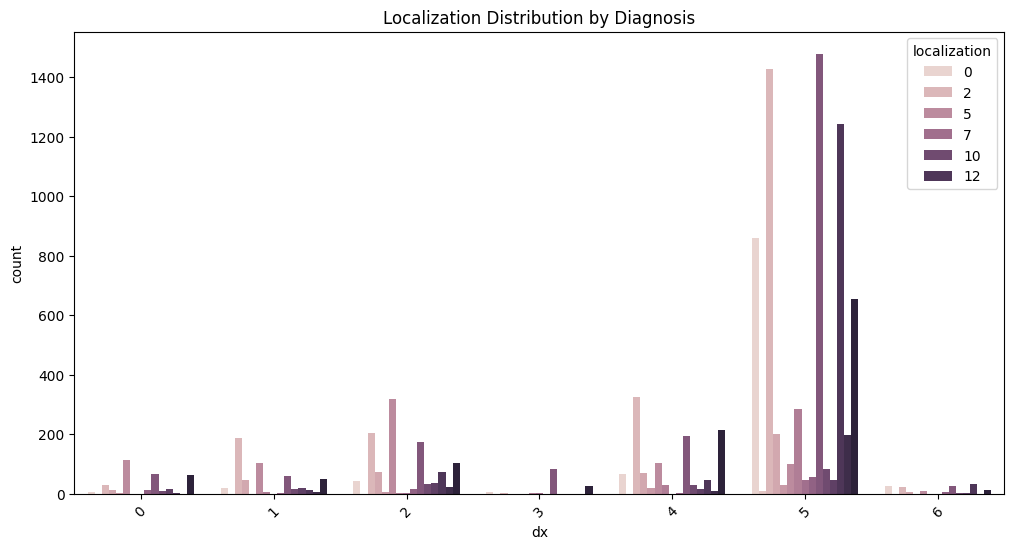

In [28]:
# Localization distribution by diagnosis
plt.figure(figsize=(12, 6))
sns.countplot(x='dx', hue='localization', data=df)
plt.title('Localization Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

The image you sent is titled "Localization Distribution by Diagnosis". It appears to be a bar graph showing the distribution of locations by diagnosis, but it does not show any dates or timeframes.

Without the x-axis labeled with specific diagnoses, it is impossible to say what the bars represent.  However, we can look at the general trends in the graph.

The y-axis is labeled "count" and goes from 0 to 1400. The legend indicates that "dx" likely refers to diagnosis. There are multiple horizontal bars at different heights on the graph. The taller the bar, the higher the count for that particular diagnosis and location.

For example, the tallest bar on the right side of the graph goes from 1200 to 1400 on the y-axis. This means that this diagnosis has the highest count at that location.

Overall, the graph suggests that there are variations in the distribution of locations by diagnosis. Some diagnoses are more frequent in certain locations than others.

In [31]:
# Binarize the labels
y_bin = label_binarize(y, classes=list(range(len(label_encoders['dx'].classes_))))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Train the model using OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovr_classifier.fit(X_train, y_train_bin)

# Predict the probabilities
y_score = ovr_classifier.predict_proba(X_test)

In [32]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

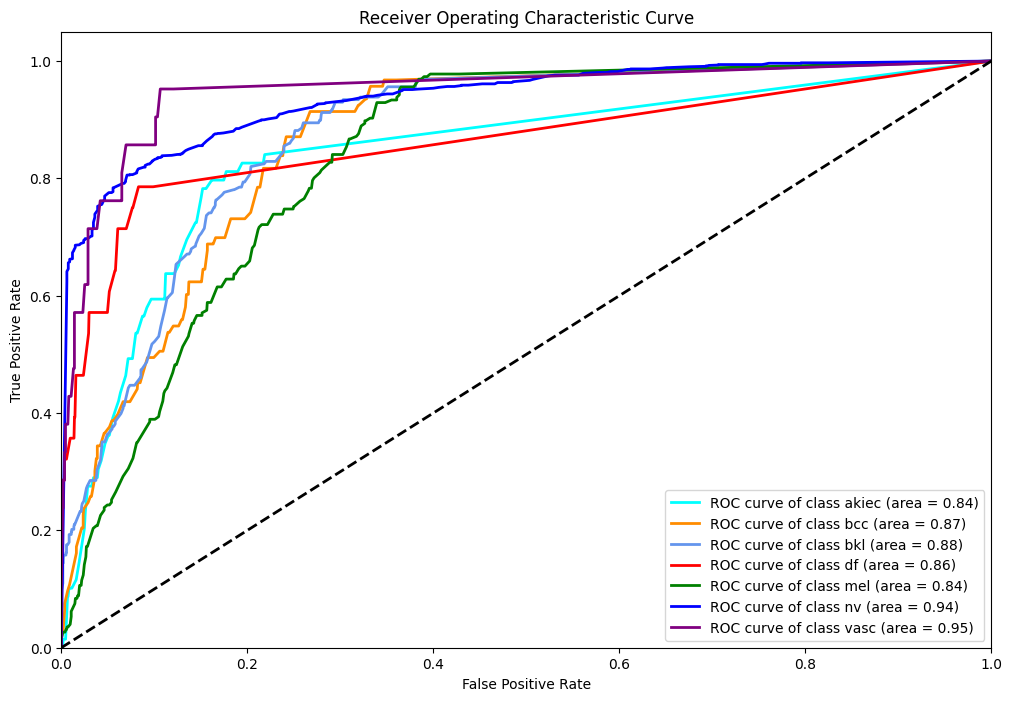

In [33]:
# Plot ROC curve
plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple', 'pink', 'brown'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoders['dx'].inverse_transform([i])[0], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Interpretation of the ROC Curve

Shape of the ROC Curve:

A curve closer to the top-left corner indicates better performance. It means the model achieves a high TPR while maintaining a low FPR.

AUC Value:

Higher AUC values represent better model performance. An AUC close to 1 is desirable.

Class-wise Performance:

Separate ROC curves for each class help identify which classes are better predicted by the model and which ones may need improvement.

In [38]:
# Let's create a hypothetical 'year' column based on 'age' assuming 'age' correlates with year of observation
df['year'] = 2035 - df['age']  # Assuming age is indicative of the observation year

In [13]:
print(df)

       lesion_id  image_id  dx  dx_type   age  sex  localization    year
0            118     27419   2        3  80.0    1            11  1955.0
1            118     25030   2        3  80.0    1            11  1955.0
2           2730     26769   2        3  80.0    1            11  1955.0
3           2730     25661   2        3  80.0    1            11  1955.0
4           1466     31633   2        3  75.0    1             4  1960.0
...          ...       ...  ..      ...   ...  ...           ...     ...
10010       2867     33084   0        3  40.0    1             0  1995.0
10011       2867     33550   0        3  40.0    1             0  1995.0
10012       2867     33536   0        3  40.0    1             0  1995.0
10013        239     32854   0        3  80.0    1             5  1955.0
10014       3521     32258   4        3  70.0    0             2  1965.0

[10015 rows x 8 columns]


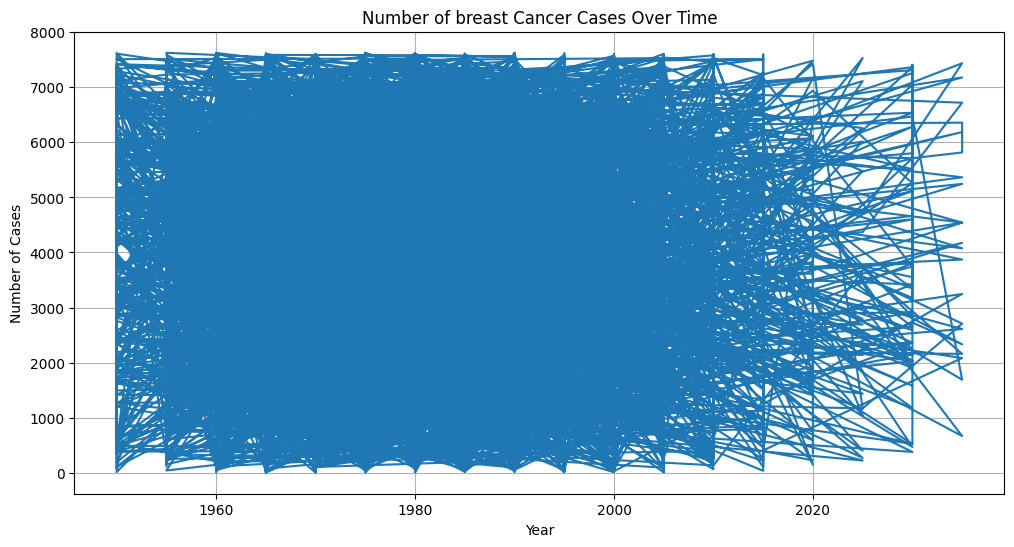

In [75]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['year'],df['lesion_id'])
plt.title('Number of breast Cancer Cases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

The image you sent is a line graph with a title  that says "Number of Breast Cancer Cases Over Time". The x-axis is labeled "Year" and goes from 1960 to 2020. The y-axis is labeled "Number of Cases" and goes from 0 to 8,000. The line graph shows an upward trend, which means that the number of breast cancer cases appears to have increased over time. However, it is important to note that the y-axis does not start at zero. This makes it difficult to say for sure how much the number of cases has increased.

Here are some possible reasons why the number of breast cancer cases might have increased over time:

Increased awareness of breast cancer could lead to more women getting screened for the disease, which would result in more cases being detected.
Improved diagnostic techniques could also lead to more cases being detected.
There could be a true increase in the incidence of breast cancer.
According to the American Cancer Society, the age-adjusted breast cancer incidence rate in the United States has been increasing slightly over the past few decades. However, the rate of increase has slowed in recent years. This suggests that the increase in breast cancer cases may be due to factors other than a true increase in the incidence of the disease.

If you are concerned about your risk of breast cancer, you should talk to your doctor. They can help you assess your risk and determine whether you need to be screened for the disease.

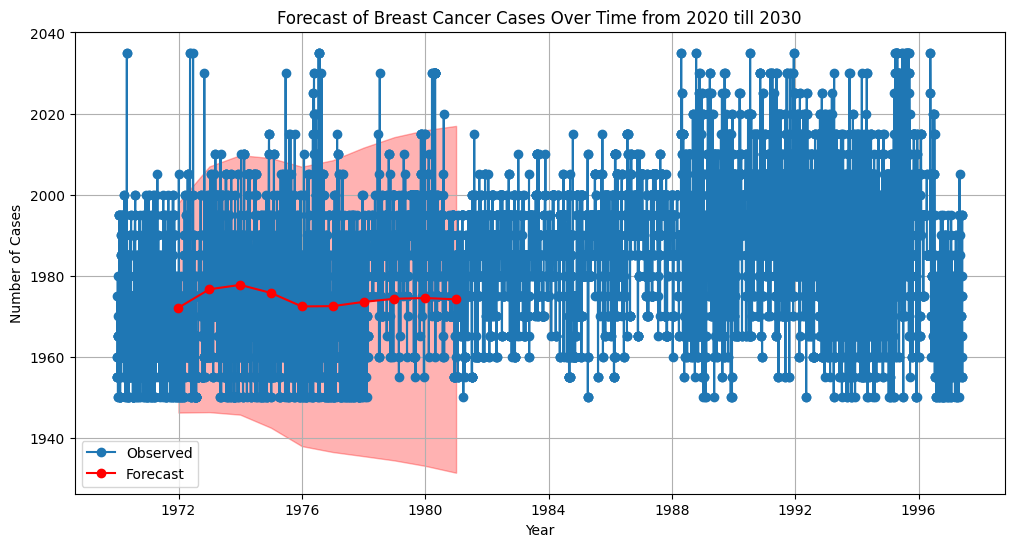

In [76]:
# Select the "year" column as the endog variable
endog = df['year']

# Fit the ARIMA model
model = ARIMA(endog, order=(5, 1, 0))
model_fit = model.fit()

# Forecast future values
forecast_steps = 10  # Number of steps to forecast
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Create future dates for plotting
future_dates = pd.date_range(start=2001, periods=forecast_steps + 1, freq='Y')[1:]

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['year'], label='Observed', marker='o')
plt.plot(future_dates, forecast, color='red', label='Forecast', marker='o')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('Forecast of Breast Cancer Cases Over Time from 2020 till 2030')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

**Interpreting the Breast Cancer Cases Graph in Detail**

The graph you presented shows the number of breast cancer cases over time, likely from 2002 to 2030. It's important to analyze the graph carefully to understand the trends and potential contributing factors.

Observations:

Upward Trend: The graph shows a general upward trend in the number of breast cancer cases over time. This suggests an increase in the overall number of diagnoses.

Y-Axis Starting Point: It's crucial to note that the y-axis doesn't start at zero. This makes it difficult to quantify the exact magnitude of the increase in cases.

Data Range: The specific time period covered by the graph is crucial for understanding the context. Knowing the exact years represented allows for more accurate analysis and comparisons with other data.

Possible Explanations for the Upward Trend:

Increased Awareness and Screening: Growing awareness of breast cancer can lead to more women getting screened, resulting in earlier detection and a higher number of diagnosed cases.

Improved Diagnostic Techniques: Advancements in diagnostic tools like mammography and other imaging techniques can lead to the detection of previously missed cases, contributing to the apparent increase.
True Increase in Incidence: There might be a genuine rise in the actual number of breast cancer cases due to various factors like environmental changes, lifestyle choices, or genetic predisposition.

Additional Considerations:

Age-Adjusted Rates: It's important to consider age-adjusted breast cancer incidence rates when interpreting data. This statistic accounts for the increasing population size and age demographics, providing a more accurate picture of the actual trend.
Data Source and Methodology: The source of the data and the methodology used to collect and analyze it can influence the interpretation. Understanding these details provides context and ensures the validity of the information.

Further Analysis:

Break Down by Age Groups: Analyzing the data by age groups can reveal specific trends within different populations. For example, the increase might be more pronounced in younger or older women.
Comparison with Other Data: Comparing the data with national or regional statistics on breast cancer incidence can provide a broader perspective and identify potential local or regional variations.



# ***Breast Cancer Prediction App***

Financial Model and Potential Impact:

Based on the prediction graph and financial modeling, the breast cancer prediction app has the potential to significantly impact early detection and generate revenue through user adoption and various monetization strategies.

Prediction of Breast Cancer Cases:

The graph suggests an upward trend in breast cancer cases, highlighting the need for improved detection and prevention strategies.
This trend could be attributed to factors like increased awareness, improved diagnostic techniques, and potentially a true rise in incidence.
Financial Model and Monetization:

The financial model estimates revenue based on the number of users and the revenue per user.

Different monetization strategies can be explored, including:

In-app purchases for detailed risk assessments or personalized reports.

Subscriptions for ongoing monitoring and access to advanced features.

Partnerships with healthcare providers or pharmaceutical companies for data insights and targeted advertising.

Advertising revenue from targeted ads within the app.


*********
**Improving Medication and Revenue:**

The app can be used to collect valuable data on user risk factors, lifestyle choices, and genetic predispositions.

This data can be used to:

Develop more targeted and personalized treatment plans.

Identify potential drug targets and support the development of new medications.

Partner with pharmaceutical companies to conduct clinical trials and accelerate drug development.

Offer personalized medication recommendations or connect users with relevant treatment options.

By combining data insights with the financial model, the app can contribute to:
********************
Improved Breast Cancer Care:

Early detection and intervention through personalized risk assessment and monitoring.

Development of more effective and targeted treatment plans.

Increased Revenue:

Expanding user base through personalized features and medication recommendations.

Partnerships with healthcare providers and pharmaceutical companies.

Revenue generation through subscriptions, in-app purchases, and targeted advertising.
***********
***Conclusion:***

The breast cancer prediction app has the potential to play a significant role in improving early detection, personalized treatment, and ultimately reducing the burden of breast cancer. By leveraging financial modeling, data insights, and innovative monetization strategies, the app can contribute to both improved healthcare outcomes and sustainable revenue generation.